<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load the Data

In [16]:
file_path = 'Traffic_Accidents.csv'
df = pd.read_csv(file_path)
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [18]:
summary_stats = df.describe()
summary_stats

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [19]:
df.duplicated().sum()

43

In [20]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [21]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]
print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (48616, 26)


In [22]:
print(df_no_outliers.describe())

       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           48616.000000            48616.000000  48616.000000   
mean           442530.345504           291958.015797     -1.393409   
std             95426.072757           152682.228647      1.400222   
min            155850.000000            19030.000000     -5.564971   
25%            376880.000000           177090.000000     -2.345514   
50%            443235.000000           256475.000000     -1.361006   
75%            525510.000000           395120.000000     -0.191816   
max            654960.000000           781860.000000      1.753632   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  48616.000000  48616.000000       48314.000000        48616.000000   
mean      52.515448     29.720606           2.837024            1.810947   
std        1.375250     25.007321           0.402339            0.648473   
min       50.026153      1.000000           1.000000            1

In [23]:
numerical_features = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_no_outliers.select_dtypes(include=['object']).columns
imputer_num = SimpleImputer(strategy='median')
df_no_outliers.loc[:, numerical_features] = imputer_num.fit_transform(df_no_outliers[numerical_features])
imputer_cat = SimpleImputer(strategy='most_frequent')
df_no_outliers.loc[:, categorical_features] = imputer_cat.fit_transform(df_no_outliers[categorical_features])

print("Shape after imputing missing data:", df_no_outliers.shape)
print("Number of missing values after imputation:", df_no_outliers.isnull().sum().sum())


Shape after imputing missing data: (48616, 26)
Number of missing values after imputation: 0


In [24]:
numerical_features = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_no_outliers[numerical_features] = scaler.fit_transform(df_no_outliers[numerical_features])

print("Statistc after scaling:")
print(df_no_outliers[numerical_features].describe())


Statistc after scaling:
       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           4.861600e+04            4.861600e+04  4.861600e+04   
mean            1.493695e-16            1.487849e-16 -4.940008e-17   
std             1.000010e+00            1.000010e+00  1.000010e+00   
min            -3.004245e+00           -1.787574e+00 -2.979246e+00   
25%            -6.879778e-01           -7.523416e-01 -6.799744e-01   
50%             7.384373e-03           -2.324002e-01  2.314181e-02   
75%             8.695790e-01            6.756716e-01  8.581533e-01   
max             2.226140e+00            3.208671e+00  2.247553e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  4.861600e+04  4.861600e+04       4.861600e+04        4.861600e+04   
mean  -3.067774e-15 -7.866744e-17      -2.692158e-16        8.608476e-17   
std    1.000010e+00  1.000010e+00       1.000010e+00        1.000010e+00   
min   -1.810085e+00 -1.148500e+00      -4

<ipython-input-24-b0fefa41ab92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[numerical_features] = scaler.fit_transform(df_no_outliers[numerical_features])


**Scaling of Data:**

- The numerical features were successfuly scaled using `StandardScaler`.
- each feature has a mean close to 0 and a standard deviation close to 1
- now we are ready

In [25]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_no_outliers[numerical_features])

In [26]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()
print("Shapeafter PCA:", df_pca.shape)

Shapeafter PCA: (48616, 13)


In [66]:
explained_variance =

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio'

In [27]:
categorical_features = df_no_outliers.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = encoder.fit_transform(df_no_outliers[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:

df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_features))
df_final = pd.concat([df_pca, df_encoded], axis=1)
print("Shape after OneHot Encoding:", df_final.shape)
df_final.head()


Shape after OneHot Encoding: (48616, 3528)


,0,1,2,3,4,5,6,7,8,9,...,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,-0.717092,3.581239,-0.462047,-1.476290,-0.504567,-0.988647,-0.360233,0.732295,0.502700,-0.020343,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-2.374107,-0.859587,0.101939,0.242753,0.168571,-0.064208,0.593729,-1.301941,-1.040675,0.002567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.144750,-0.527918,-3.361783,2.495884,-1.159571,-0.868405,1.830495,-0.928571,3.541166,3.837381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.494315,-2.623433,0.401183,-0.489913,0.685288,0.186131,-1.543162,0.507635,0.797164,1.226675,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.430581,-1.214794,0.084625,-0.405372,0.919738,0.444190,0.302662,0.187506,-1.449786,0.866035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.



**Selected Features:**


PCA educing data complexity.


PCA keeps key features One-Hot Encding keeps category differences

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

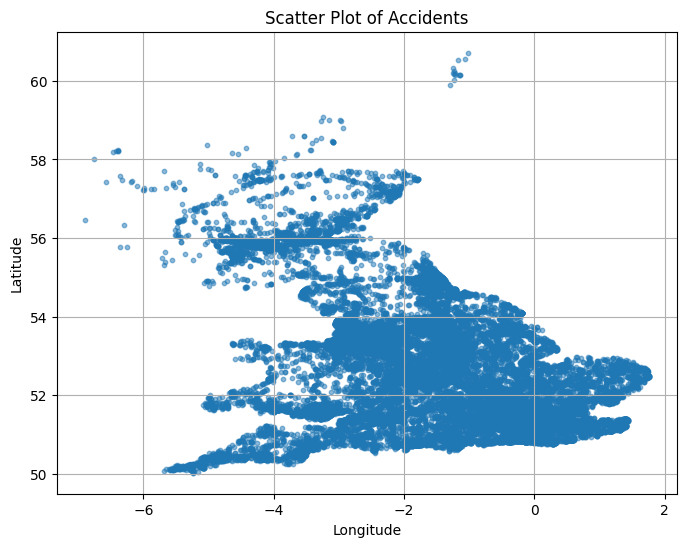

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10)
plt.title('Scatter Plot of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?